#Connect to Google Drive

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
#move to images folder 
%cd /content/gdrive/MyDrive/dataset/Animation/_NewEdition/

/content/gdrive/MyDrive/dataset/Animation/_NewEdition


#Get the frame from Gif

In [ ]:
import numpy as np
from PIL import Image, ImageSequence
import matplotlib.pyplot as plt
import cv2

In [ ]:
IMAGE_SIZE = 128
IMAGE_SIZE_OUTPUT = 256
IMAGE_CHANNELS = 3
images_path = 'Animation/test/'
output_path = 'Frame/test/'

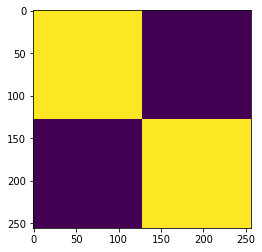

In [ ]:
#test
test = np.ones([2, 2])
test[0, 1] = np.zeros([1, 1])
test[1, 0] = np.zeros([1, 1])
plt.imshow(test)

test2 = cv2.resize(test, dsize=(IMAGE_SIZE_OUTPUT, IMAGE_SIZE_OUTPUT), interpolation=cv2.INTER_NEAREST)
plt.imshow(test2)

In [ ]:
n = 1 #file name number starter

#loop from image name 
for i in os.listdir(images_path):
  #get all frames from GIF
  img = Image.open('%s%s'%(images_path, i))
  frames = np.array([np.array(frame.copy().convert('RGB').resize((IMAGE_SIZE, IMAGE_SIZE), Image.ANTIALIAS).getdata(),dtype=np.uint8).reshape(IMAGE_SIZE,IMAGE_SIZE,3) for frame in ImageSequence.Iterator(img)])

  #Make folder if folder doesn't exist
  if not os.path.exists(output_path):
      os.makedirs(output_path)

  #Resize image first frame and middle frame
  im = frames[0]
  image = np.reshape(im, (IMAGE_SIZE, IMAGE_SIZE, IMAGE_CHANNELS))
  image = cv2.resize(image, dsize=(IMAGE_SIZE_OUTPUT, IMAGE_SIZE_OUTPUT), interpolation=cv2.INTER_NEAREST)
  #im2 = frames[frames.shape[0]//2]
  #image2 = np.reshape(im2, (IMAGE_SIZE, IMAGE_SIZE, IMAGE_CHANNELS))
  #image2 = cv2.resize(image2, dsize=(IMAGE_SIZE_OUTPUT, IMAGE_SIZE_OUTPUT), interpolation=cv2.INTER_NEAREST)
  
  #Save image first frame and middle frame
  filename = '%d.jpeg'%(n)
  name = os.path.join(output_path, filename)
  image = Image.fromarray(image)
  image.save(name, quality=100, subsampling=0)
  n = n+1

  #filename = '%d.jpeg'%(n)
  #name = os.path.join(output_path, filename)
  #image2 = Image.fromarray(image2)
  #image2.save(name, quality=100, subsampling=0)
  #n = n+1

##Frame Frame Horizontal

In [ ]:
import numpy as np
from PIL import Image, ImageSequence
import matplotlib.pyplot as plt
import cv2

In [ ]:
images_path = 'Frame/train2/'
output_path = 'FrameFrame/train2/'

In [ ]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

In [ ]:
for i in os.listdir(images_path):
  #Make folder if folder doesn't exist
  if not os.path.exists(output_path):
      os.makedirs(output_path)
  img = Image.open('%s%s'%(images_path, i))
  img_concat = get_concat_h(img, img)

  #Save image first frame and middle frame
  filename = i
  print(i)
  name = os.path.join(output_path, filename)
  img_concat.save(name, quality=100, subsampling=0)

1.jpeg
2.jpeg
3.jpeg
4.jpeg
5.jpeg
6.jpeg
7.jpeg
8.jpeg
9.jpeg
10.jpeg
11.jpeg
12.jpeg
13.jpeg
14.jpeg
15.jpeg
16.jpeg
17.jpeg
18.jpeg
19.jpeg
20.jpeg
21.jpeg
22.jpeg
23.jpeg
24.jpeg
25.jpeg
26.jpeg
27.jpeg
28.jpeg
29.jpeg
30.jpeg
31.jpeg
32.jpeg
33.jpeg
34.jpeg
35.jpeg
36.jpeg
37.jpeg
38.jpeg
39.jpeg
40.jpeg
41.jpeg
42.jpeg
43.jpeg
44.jpeg
45.jpeg
46.jpeg
47.jpeg
48.jpeg
49.jpeg
50.jpeg
51.jpeg
52.jpeg
53.jpeg
54.jpeg
55.jpeg
56.jpeg
57.jpeg
58.jpeg
59.jpeg
60.jpeg
61.jpeg
62.jpeg
63.jpeg
64.jpeg
65.jpeg
66.jpeg
67.jpeg
68.jpeg
69.jpeg
70.jpeg
71.jpeg
72.jpeg
73.jpeg
74.jpeg
75.jpeg
76.jpeg
77.jpeg
78.jpeg
79.jpeg
80.jpeg
81.jpeg
82.jpeg
83.jpeg
84.jpeg
85.jpeg
86.jpeg
87.jpeg
88.jpeg
89.jpeg
90.jpeg
91.jpeg
92.jpeg
93.jpeg
94.jpeg
95.jpeg
96.jpeg
97.jpeg
98.jpeg
99.jpeg
100.jpeg
101.jpeg
102.jpeg
103.jpeg
104.jpeg
105.jpeg
106.jpeg
107.jpeg
108.jpeg
109.jpeg
110.jpeg
111.jpeg
112.jpeg
113.jpeg
114.jpeg
115.jpeg
116.jpeg
117.jpeg
118.jpeg
119.jpeg
120.jpeg
121.jpeg
122.jpeg
123.jpeg
1

#Edge Detection

edge detection function

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
def edgeDetect(filename):
  IMG = []
  img = cv2.imread(filename)
  h = img.shape[0]
  w = img.shape[1]
  c = img.shape[2]

  #Display original image
  plt.imshow(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  #make green screen for better edge detect
  green = np.zeros([h, w, 3])
  green[:,:,1] = np.ones([h, w])*255.0
  #mask img
  img_green = img.copy()
  lower_white = np.array([230,230,230])
  upper_white = np.array([255,255,255])
  # Threshold the HSV image to get only white colors
  mask = cv2.inRange(img_green, lower_white, upper_white)
  mask = cv2.bitwise_not(mask)
  mask = cv2.dilate(mask, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
  mask = cv2.erode(mask, cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)))
  def replace_background_pixels(frame, bg, mask):
    frame[mask == 0] = bg[mask == 0]
    return frame
  img_green = replace_background_pixels(img_green, green, mask)

  # Convert to graycsale
  img_gray = cv2.cvtColor(img_green, cv2.COLOR_BGR2GRAY)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl1 = clahe.apply(img_gray)
  # Blur the image for better edge detection
  img_blur = cv2.GaussianBlur(cl1, (3,3), 0)

  # Canny Edge Detection
  edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
  edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
  edges = cv2.bitwise_not(edges)
  # Display Canny Edge Detection Image
  plt.imshow(edges)

  img_concat = cv2.hconcat([img, edges])

  #loop pixel for extract character from background and erode
  #img2 = img.copy()
  #img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  #for y in range(0, h):
    #for x in range(0, w):
      #img2[y, x] = 0 if img2[y, x] == 255 else 255
  #kernel = np.ones((5,5),np.uint8)
  #img2 = cv2.erode(img2,kernel,iterations = 5)
  #img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
  
  #append each img to IMG for subplot
  IMG.append(img_green)
  IMG.append(img_gray)
  IMG.append(cl1)
  IMG.append(img_blur)
  IMG.append(img_concat)
  #IMG.append(img2)

  #subplot to see result
  columns = 1
  rows = 5
  fig = plt.figure(figsize=(8*columns, 8*rows))
  for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(IMG[i-1])
  #plt.show()
  plt.close()

  return img_concat

In [ ]:
def edgeDetect2(filename):
  IMG = []
  img = cv2.imread(filename)
  h = img.shape[0]
  w = img.shape[1]
  c = img.shape[2]
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

  # Convert to graycsale
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

  #thresholding
  img_gray = 255 - img_gray
  img_gray[img_gray > 15] = 255
  img_gray[img_gray <= 15] = 0

  #closing hole
  kernel = np.ones((3, 3), np.uint8)
  closing = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel)

  #detect Edges by Canny method
  edges = cv2.Canny(closing, 100, 200)
  edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB) 
  edges = cv2.bitwise_not(edges)

  #cocat image horizontal
  img_concat = cv2.hconcat([img, edges])

  #append each img to IMG for subplot
  IMG.append(img_gray)
  IMG.append(closing)
  IMG.append(edges)
  #IMG.append(img2)

  #subplot to see result
  columns = 1
  rows = len(IMG)
  fig = plt.figure(figsize=(8*columns, 8*rows))
  for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(IMG[i-1])
  #plt.show()
  plt.close()

  return img_concat

run loop process

In [ ]:
#move to images folder 
%cd /content/gdrive/MyDrive/dataset/Animation/Frame/test

/content/gdrive/MyDrive/dataset/Animation/Frame/test


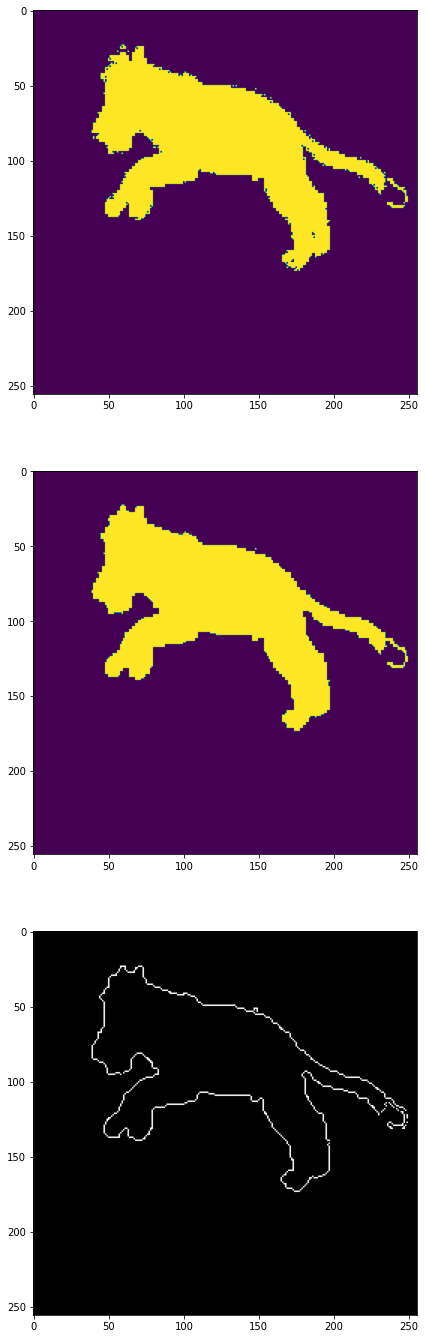

In [ ]:
#test function
edgeDetect2('7.jpeg')

In [ ]:
images_path = '.'
n = 1 #start count for name of the file
saveFolderName = 'test'

for i in os.listdir(images_path):
  filename = i
  print(i)
  img_concat = edgeDetect2(filename)

  image = Image.fromarray(img_concat)
  image.save('../../FrameEdge3/%s/%s.jpg'%(saveFolderName, n)) #Change the directory to save for train image or test image !!!
  n = n + 1

1.jpeg
2.jpeg
3.jpeg
4.jpeg
5.jpeg
6.jpeg
7.jpeg
8.jpeg
9.jpeg
10.jpeg
11.jpeg
12.jpeg
13.jpeg
14.jpeg
15.jpeg
16.jpeg
17.jpeg
18.jpeg
19.jpeg
20.jpeg
21.jpeg
22.jpeg
23.jpeg
24.jpeg
25.jpeg
26.jpeg
27.jpeg
28.jpeg
29.jpeg
30.jpeg
31.jpeg
32.jpeg
33.jpeg
34.jpeg
35.jpeg
36.jpeg
37.jpeg
38.jpeg
39.jpeg
40.jpeg
41.jpeg
42.jpeg
43.jpeg
44.jpeg
45.jpeg
46.jpeg
47.jpeg
48.jpeg
49.jpeg
50.jpeg
51.jpeg
52.jpeg
53.jpeg
54.jpeg
55.jpeg
56.jpeg
57.jpeg
58.jpeg
59.jpeg
60.jpeg
61.jpeg
62.jpeg
63.jpeg
64.jpeg
65.jpeg
66.jpeg
67.jpeg
68.jpeg
69.jpeg
